# COCONUT database analysis

In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
from rdkit.Chem import rdMolDescriptors as rdescriptors
import matplotlib.pyplot as plt
import seaborn as sns

RDKit WARNING: [12:56:26] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
#Loading coconut database from sdf format
coco = Chem.SDMolSupplier('COCONUT_DB.sdf')
coco_d = [m for m in coco if m]

In [5]:
#Number of natural products
len(coco_d)

405960

In [6]:
#Molecular weight of specific substance ( i = 12)
rdescriptors.CalcExactMolWt(coco_d[12])

438.0328070879999

In [7]:
#LogP of specific substance ( i = 2)
Descriptors.MolLogP(coco_d[2])

3.3226200000000023

In [8]:
# List of molecular weights of natural products
db_mw = []
for substance in coco_d:
		db_mw.append(rdescriptors.CalcExactMolWt(substance))

In [9]:
# List of molecular octanol-water partition coefficient
db_logP = []
for substance in coco_d:
		db_logP.append(Descriptors.MolLogP(substance))

In [10]:
#Creating dataframe of logP and MW value of COCONUT products
df_COCO = pd.DataFrame(data={'MW': db_mw,'logP': db_logP })

df_COCO['name'] = "COCO"
df_COCO

,MW,logP,name
0,660.183639,-2.08210,COCO
1,598.183897,3.63422,COCO
2,554.157682,3.32262,COCO
3,534.298139,6.87940,COCO
4,540.142032,3.01962,COCO
...,...,...,...
405955,216.078644,2.75660,COCO
405956,570.188983,4.77902,COCO
405957,420.157288,4.82510,COCO
405958,1183.685261,-1.20930,COCO


In [11]:
#Statistic of COCONUT'S logP values
df_COCO["logP"].describe()

count    405960.000000
mean          3.237199
std           3.284358
min         -33.287100
25%           1.569700
50%           3.123500
75%           4.715605
max          47.597260
Name: logP, dtype: float64

In [12]:
#Statistic of COCONUT'S MW values
df_COCO["MW"].describe()

count    405960.000000
mean        478.502381
std         259.526564
min          74.015650
25%         324.111007
50%         414.226705
75%         547.202859
max        3343.924977
Name: MW, dtype: float64

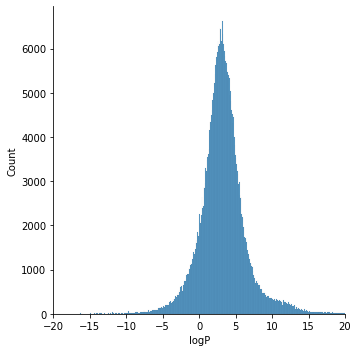

In [13]:
#Histogram of logP value of products
sns.displot(df_COCO, x="logP" )
plt.xlim(-20, 20);

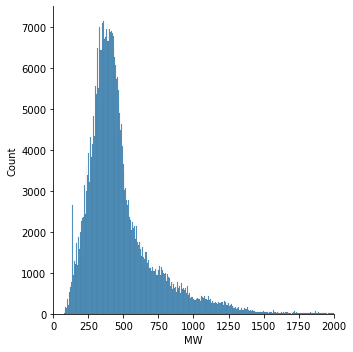

In [14]:
#Histogram of MW value of products
sns.displot(df_COCO, x="MW" )
plt.xlim(0, 2000);

<AxesSubplot:>

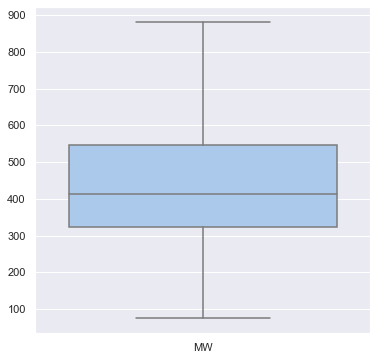

In [15]:
#Boxplot of COCONUT'S MW values
sns.set(rc={'figure.figsize':(6, 6)})
sns.boxplot(data=df_COCO[['MW']], 
            palette = "pastel", 
            showfliers = False)

<AxesSubplot:>

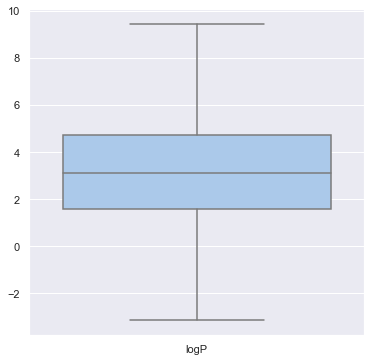

In [16]:
#Boxplot of COCONUT'S logP values
sns.set(rc={'figure.figsize':(6, 6)})
sns.boxplot(data=df_COCO[['logP']], 
            palette = "pastel", 
            showfliers = False)